In [1]:
setwd("/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM")

library(dplyr)
library(data.table)

source("/mnt/lareaulab/reliscu/code/FindModules/FindModules.R")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor



Attaching package: ‘flashClust’


The following object is masked from ‘package:fastcluster’:

    hclust


The following object is masked from ‘package:stats’:

    hclust



Attaching package: ‘svMisc’


The following object is masked from ‘package:utils’:

    ?


Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:



Allowing multi-threading with up to 48 threads.


# Pseudobulk cell type correlations

In [2]:
counts <- fread("data/tasic_2018_ALM_STAR_donor_cell_type_pseudobulk.csv", data.table=FALSE)
sample_meta <- fread("data/tasic_2018_ALM_STAR_donor_cell_type_pseudobulk_sampleinfo.csv", data.table=FALSE)

In [7]:
# For duplicate genes, choose row with highest mean expression

mean_expr <- data.frame(
    Index=1:nrow(counts), 
    Gene=counts[,1], 
    Expr=rowMeans(counts[,-1])
)

mean_expr <- mean_expr %>%
    group_by(Gene) %>%
    slice_max(Expr)

print(dim(mean_expr))

counts <- counts[mean_expr$Index,]

# Subset to genes in the top X percentile of mean expression

prob <- .3
mean_expr <- rowMeans(counts[,-1])
print(sum(mean_expr >= quantile(mean_expr, prob)))

[1] 40301     3
[1] 28221


In [8]:
counts_filtered <- counts[mean_expr >= quantile(mean_expr, .5),]

# Normalize counts by sample

total_expr <- colSums(counts_filtered[,-1])
expr <- sweep(counts_filtered[,-1], MARGIN=2, FUN="/", STATS=total_expr) * 1e4
expr <- log2(expr + 1)
expr <- data.frame(Gene=counts_filtered[,1], expr)

In [9]:
corr_mat <- WGCNA::cor(counts[,-1])

In [10]:
idx = grep("Pvalb|Lamp5|Sst", colnames(corr_mat))
subset_corr_mat = corr_mat[idx, idx]

In [12]:
subset_corr_mat

,Lamp5_229243,Lamp5_230635,Lamp5_232190,Lamp5_233508,Lamp5_233509,Lamp5_241108,Lamp5_241109,Lamp5_242963,Lamp5_242964,Lamp5_243795,⋯,Sst_311661,Sst_341959,Sst_342304,Sst_344739,Sst_345741,Sst_350651,Sst_353426,Sst_363499,Sst_364992,Sst_365746
Lamp5_229243,1.0000000,0.9440276,0.9324895,0.9841423,0.9560686,0.9475277,0.9426062,0.9387003,0.9310755,0.9437895,⋯,0.6701327,0.6614064,0.6689203,0.5778393,0.6828941,0.6107622,0.6353133,0.6563092,0.6897524,0.7781775
Lamp5_230635,0.9440276,1.0000000,0.8668953,0.9440937,0.8544550,0.9319080,0.9438231,0.8501178,0.9146409,0.8449224,⋯,0.5171827,0.4684431,0.4961474,0.3912719,0.4847753,0.4247430,0.4563153,0.5466642,0.5108630,0.8376113
Lamp5_232190,0.9324895,0.8668953,1.0000000,0.9567720,0.9611896,0.9650601,0.9494414,0.9690371,0.9643328,0.9713326,⋯,0.6955425,0.6729521,0.7268739,0.5912718,0.7091125,0.6341623,0.6353354,0.7068740,0.6556367,0.7519426
Lamp5_233508,0.9841423,0.9440937,0.9567720,1.0000000,0.9684951,0.9732779,0.9696265,0.9632711,0.9661786,0.9645992,⋯,0.6736755,0.6484957,0.6819655,0.5623017,0.6792033,0.6057978,0.6180193,0.6776564,0.6617914,0.7990224
Lamp5_233509,0.9560686,0.8544550,0.9611896,0.9684951,1.0000000,0.9456759,0.9264830,0.9850838,0.9425109,0.9889506,⋯,0.7429700,0.7380554,0.7708283,0.6495092,0.7771577,0.6961366,0.6952133,0.7266371,0.7307905,0.7267534
Lamp5_241108,0.9475277,0.9319080,0.9650601,0.9732779,0.9456759,1.0000000,0.9935826,0.9609797,0.9925637,0.9525111,⋯,0.6443824,0.5960924,0.6577481,0.5026563,0.6329989,0.5584899,0.5577338,0.6799480,0.5849290,0.8255624
Lamp5_241109,0.9426062,0.9438231,0.9494414,0.9696265,0.9264830,0.9935826,1.0000000,0.9476931,0.9904124,0.9373016,⋯,0.6240485,0.5687979,0.6327069,0.4749263,0.6058540,0.5338455,0.5323745,0.6665117,0.5629580,0.8388155
Lamp5_242963,0.9387003,0.8501178,0.9690371,0.9632711,0.9850838,0.9609797,0.9476931,1.0000000,0.9682259,0.9941479,⋯,0.7484319,0.7312940,0.7848311,0.6388257,0.7773720,0.6959713,0.6835285,0.7515026,0.7099617,0.7468338
Lamp5_242964,0.9310755,0.9146409,0.9643328,0.9661786,0.9425109,0.9925637,0.9904124,0.9682259,1.0000000,0.9564834,⋯,0.6469956,0.5953773,0.6714217,0.5017211,0.6355691,0.5630373,0.5534884,0.6899591,0.5742847,0.8185871
Lamp5_243795,0.9437895,0.8449224,0.9713326,0.9645992,0.9889506,0.9525111,0.9373016,0.9941479,0.9564834,1.0000000,⋯,0.7589556,0.7489705,0.7962383,0.6629311,0.7921915,0.7122765,0.7061534,0.7518882,0.7354465,0.7318735


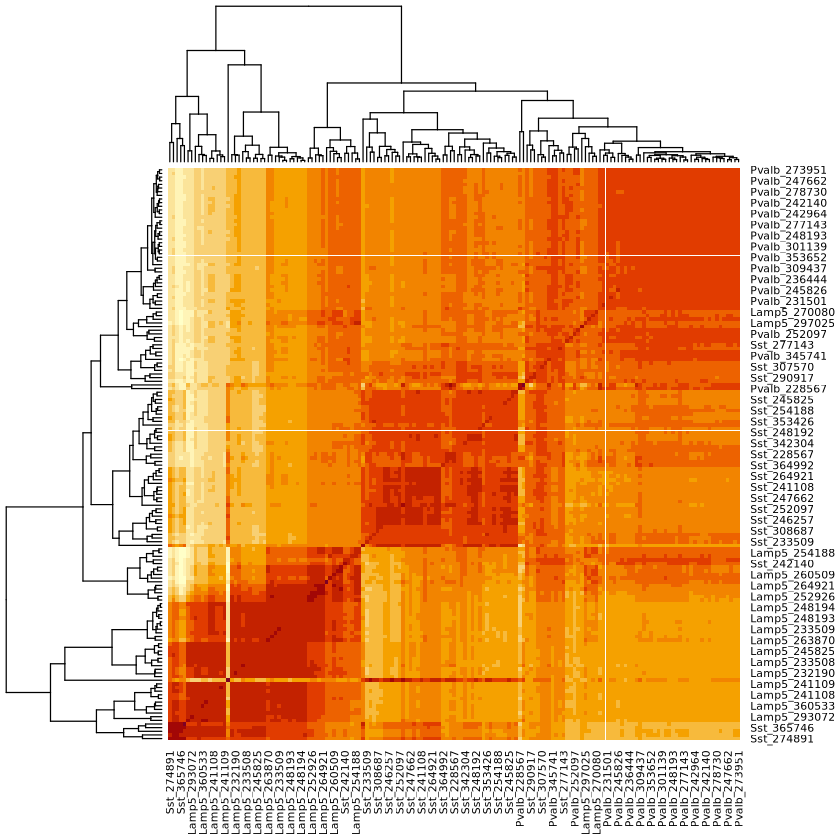

In [13]:
heatmap(subset_corr_mat)

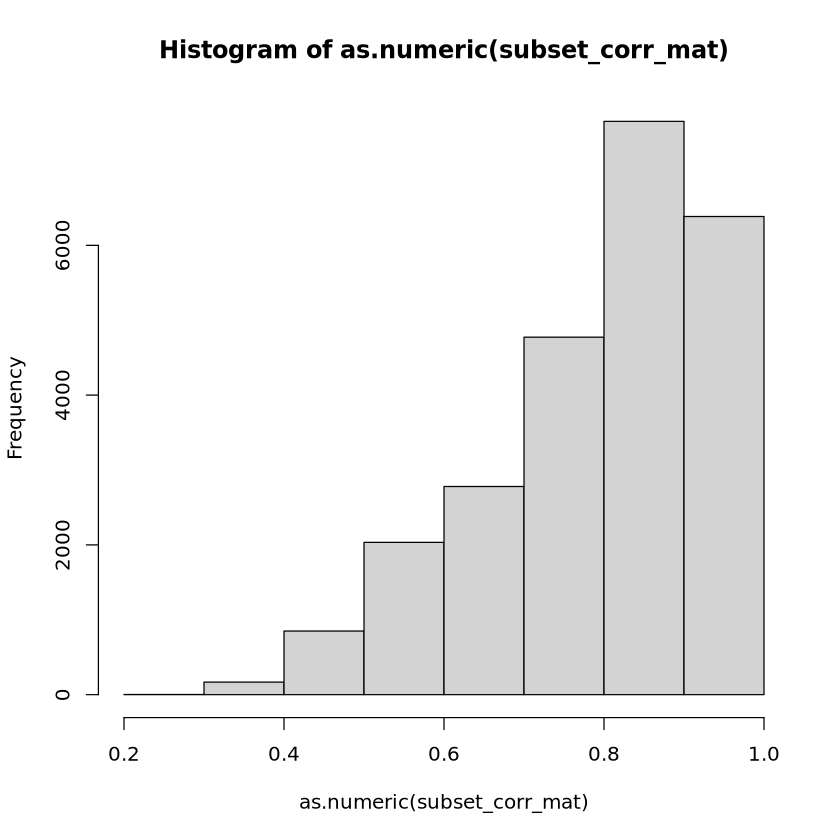

In [26]:
hist(as.numeric(subset_corr_mat), breaks=10)

# Exon counts